In [1]:
from train import Trainer
from generate_visuals import generate_heatmaps, generate_bar_graph, generate_tsne_clusters, generate_confusion_matrix
import numpy as np

## ReLU Activation and Various hyperparameter combinations

In [2]:
trainer = Trainer()
trainer.train()

🟩Training and Validation by Epoch:           🟥   0%

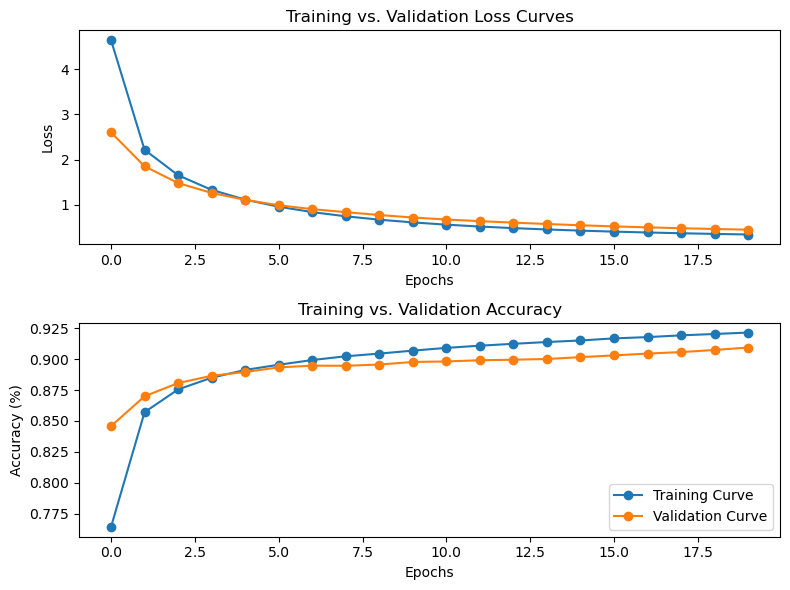

In [3]:
trainer.generate_plots()

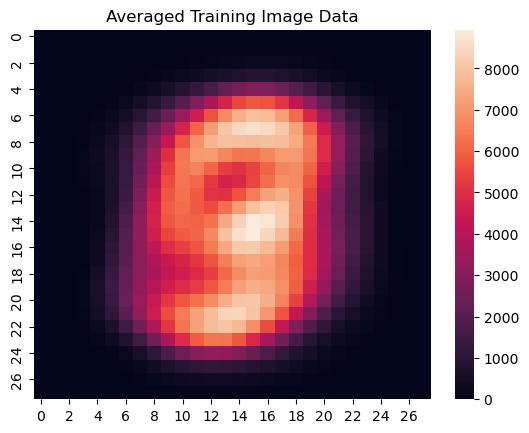

In [4]:
generate_heatmaps(
    trainer.raw_image_map.reshape((28, 28)),
    "Averaged Training Image Data",
)

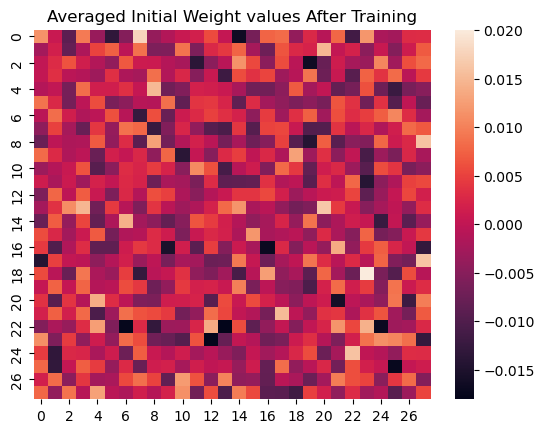

In [5]:
generate_heatmaps(
    np.average(trainer.initial_weight_values_w1, axis=1).reshape((28, 28)),
    "Averaged Initial Weight values After Training",
)

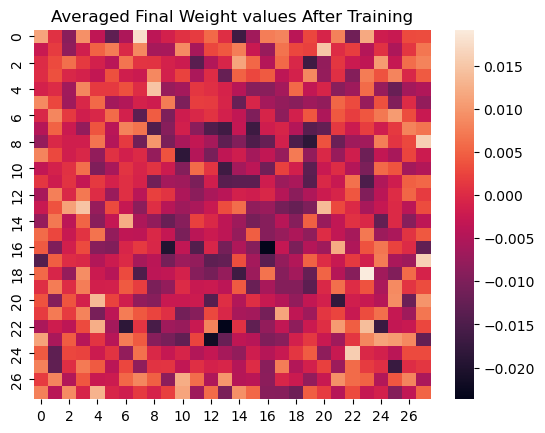

In [6]:
generate_heatmaps(
    np.average(trainer.model.params["w1"], axis=1).reshape((28, 28)),
    "Averaged Final Weight values After Training",
)

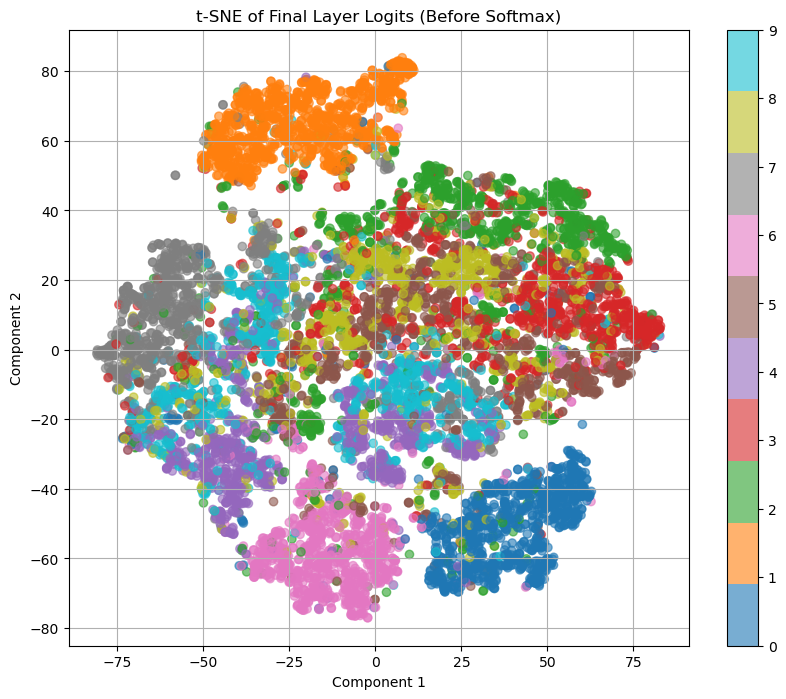

In [7]:
generate_tsne_clusters(trainer)

In [8]:
trainer = Trainer("configs/config_lr_1e-4.yaml")
trainer.train()

🟩Training and Validation by Epoch:           🟥   0%

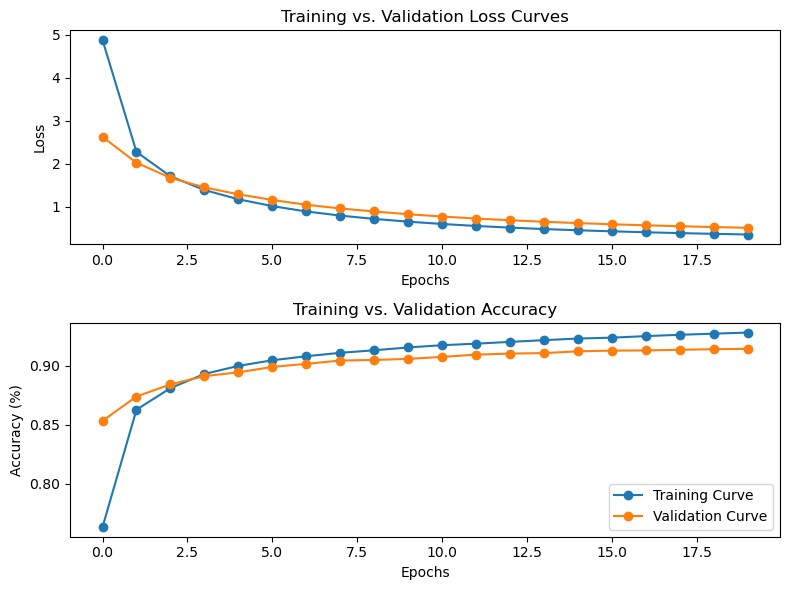

In [9]:
trainer.generate_plots()

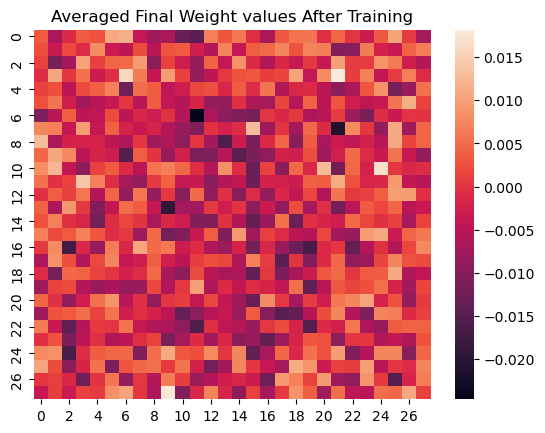

In [10]:
generate_heatmaps(
    np.average(trainer.model.params["w1"], axis=1).reshape((28, 28)),
    "Averaged Final Weight values After Training",
)

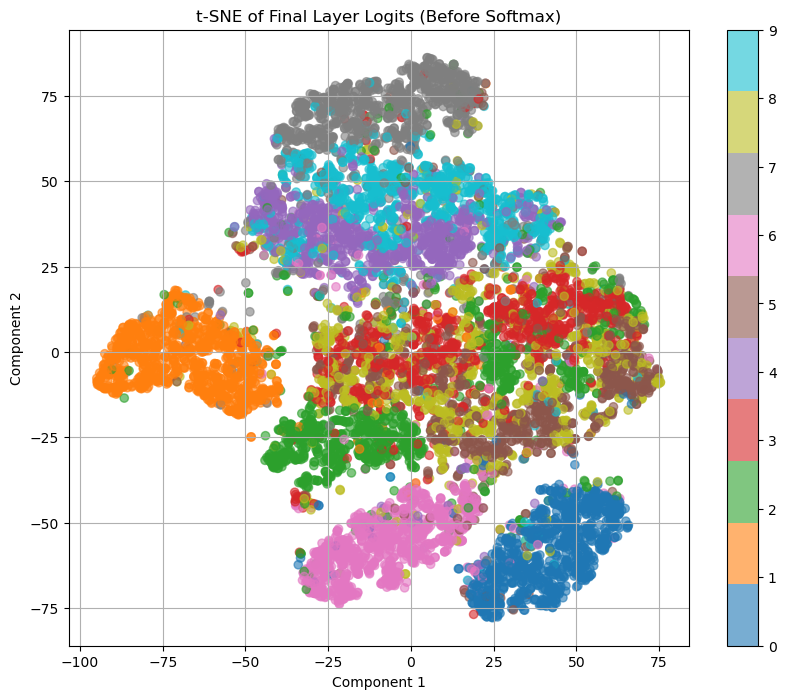

In [11]:
generate_tsne_clusters(trainer)

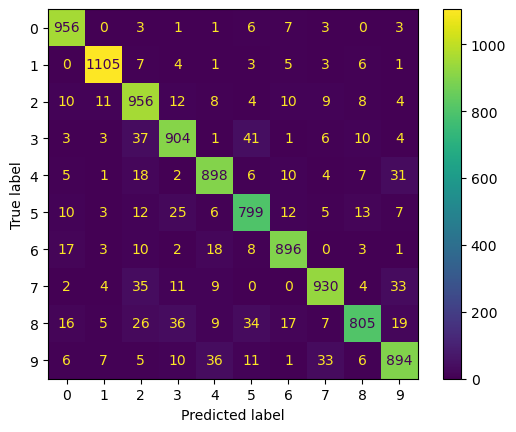

In [12]:
generate_confusion_matrix(trainer)

## Sigmoid Activation and Various hyperparameter combinations

In [13]:
trainer = Trainer(activation="sigmoid")
trainer.train()

🟩Training and Validation by Epoch:           🟥   0%

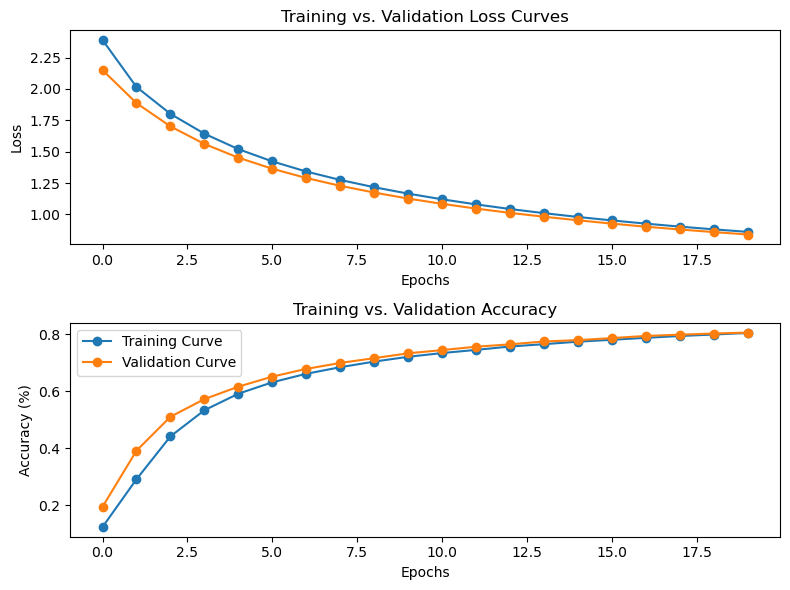

In [14]:
trainer.generate_plots()

## Best Hyperparameter combination for both activation functions

In [47]:
sig_trainer = Trainer(config_file_name="configs/config_sig.yaml", activation="sigmoid")
sig_trainer.train()

🟩Training and Validation by Epoch:           🟥   0%

/Users/akshayd/Projects/neural-networks-python/utilities/sigmoid.py:10: RuntimeWarning: overflow encountered in power
  return 1 / (1 + math.e ** (-x))


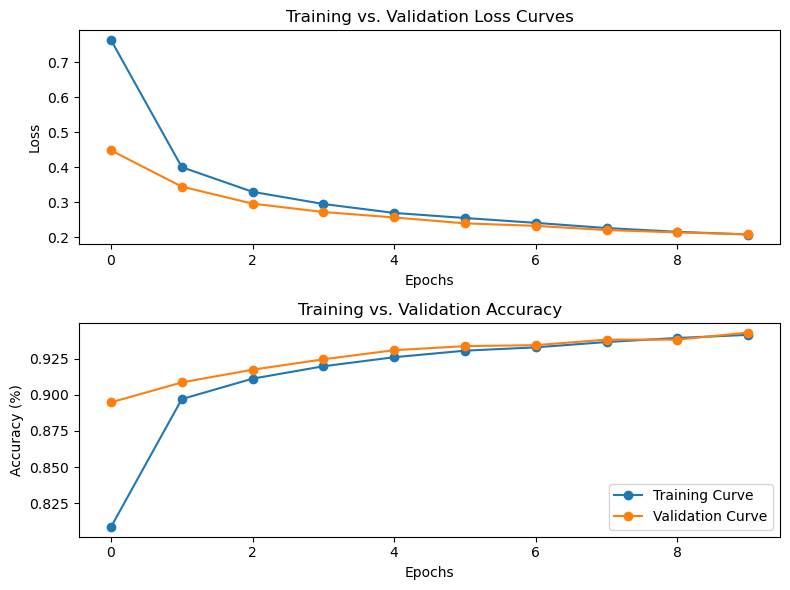

In [48]:
sig_trainer.generate_plots()

In [50]:
relu_trainer = Trainer(config_file_name="configs/config_relu.yaml")
relu_trainer.train()

🟩Training and Validation by Epoch:           🟥   0%

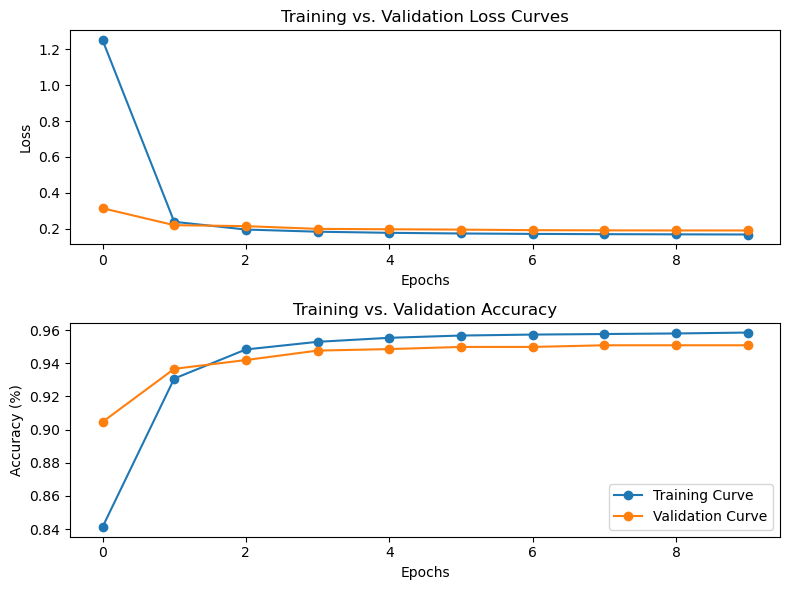

In [51]:
relu_trainer.generate_plots()

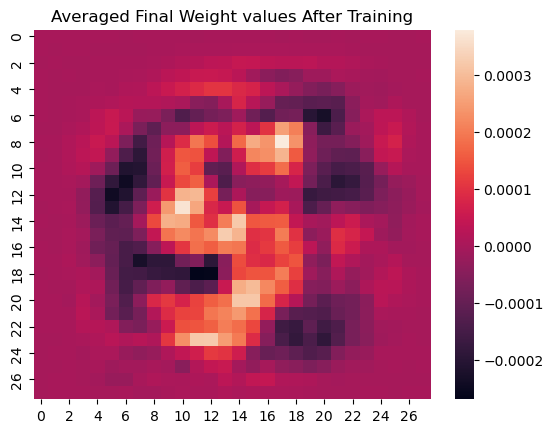

In [52]:
generate_heatmaps(
    np.average(relu_trainer.model.params["w1"], axis=1).reshape((28, 28)),
    "Averaged Final Weight values After Training",
)

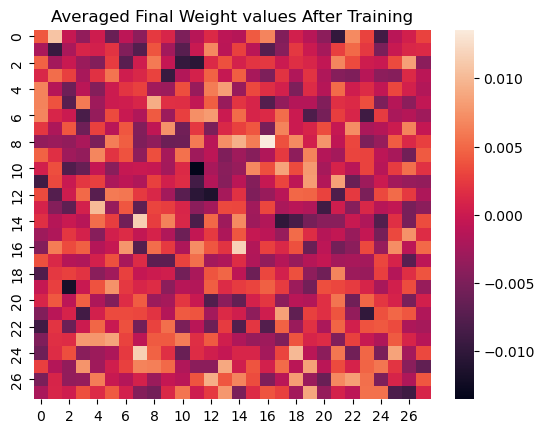

In [54]:
generate_heatmaps(
    np.average(sig_trainer.model.params["w1"], axis=1).reshape((28, 28)),
    "Averaged Final Weight values After Training",
)

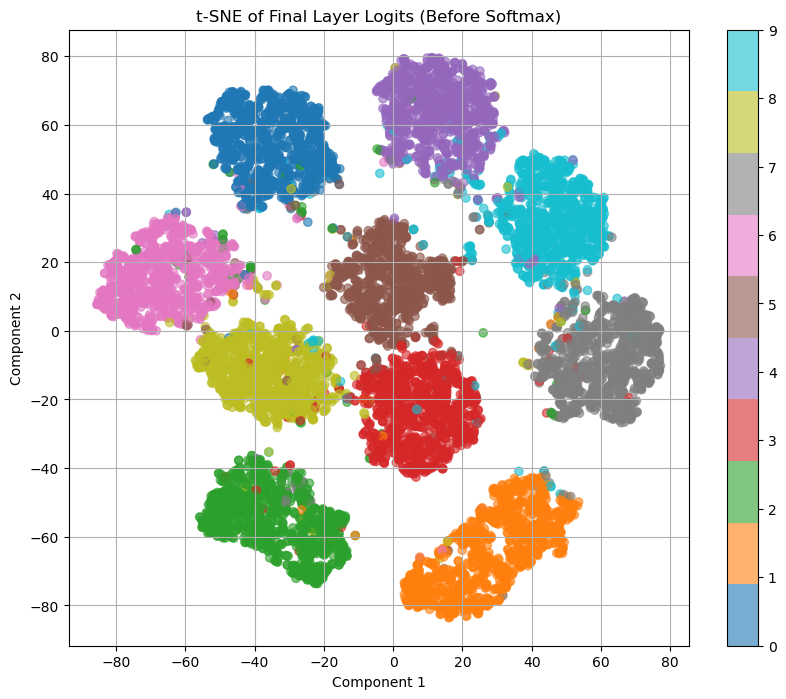

In [55]:
generate_tsne_clusters(relu_trainer)

/Users/akshayd/Projects/neural-networks-python/utilities/sigmoid.py:10: RuntimeWarning: overflow encountered in power
  return 1 / (1 + math.e ** (-x))


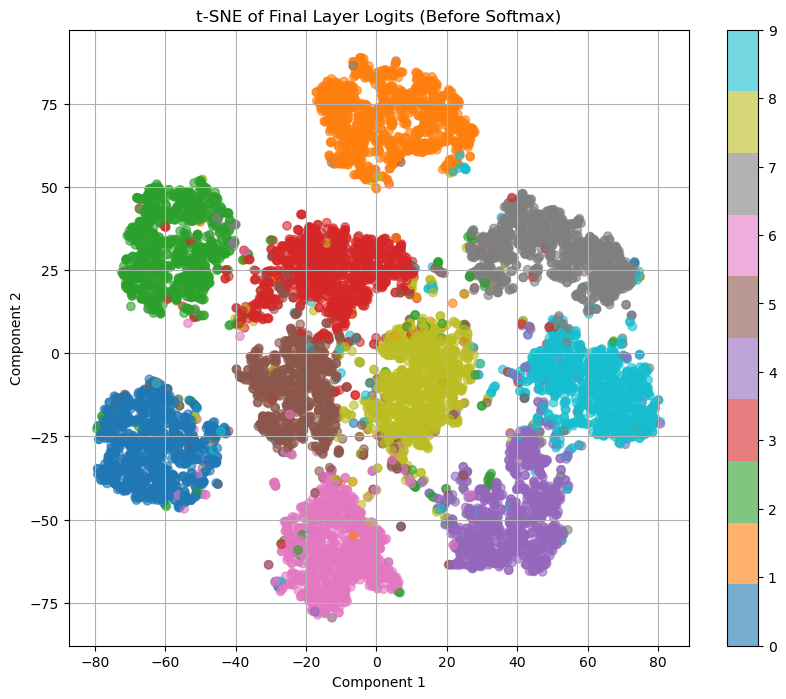

In [56]:
generate_tsne_clusters(sig_trainer)

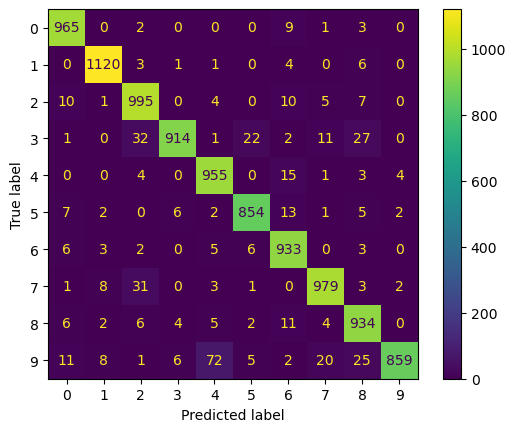

In [58]:
generate_confusion_matrix(relu_trainer)